# Chinook Data Analysis

## 1- Connection To MySQL and Creating Tables

#### Step 1: Importing Necessary Libraries

In [297]:
import pandas as pd

import json
import mysql.connector

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Read Json File Containing Config

In [2]:
with open('/Users/mahlagha/Desktop/Works in Progress/Data Science/Daneshkar/5- Data Analysis/Mentor/db_config.json', 'r') as config_file:
    db_config = json.load(config_file)

#### Step 3: Connecting to MySQL Using SQLAlchemy library

In [3]:
from sqlalchemy import create_engine

# Extract the connection details from the config
username = db_config['user']
password = db_config['password']
host = db_config['host']
database = db_config['database']

# Create the connection string
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}/{database}'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

#### Step 4: Creating Dataframes

In [4]:
Album = pd.read_sql('Album', con=engine)
Artist = pd.read_sql('Artist', con=engine)
Customer = pd.read_sql('Customer', con=engine)
Employee = pd.read_sql('Employee', con=engine)
Genre = pd.read_sql('Genre', con=engine)
Invoice = pd.read_sql('Invoice', con=engine)
InvoiceLine = pd.read_sql('InvoiceLine', con=engine)
MediaType = pd.read_sql('MediaType', con=engine)
Playlist = pd.read_sql('Playlist', con=engine)
PlaylistTrack = pd.read_sql('PlaylistTrack', con=engine)
Track = pd.read_sql('Track', con=engine)

#### Step 5: Save csv files

In [5]:
Album.to_csv('/Users/mahlagha/Chinook/data/processed/Album.csv', index=False)
Artist.to_csv('/Users/mahlagha/Chinook/data/processed/Artist.csv', index=False)
Customer.to_csv('/Users/mahlagha/Chinook/data/processed/Customer.csv', index=False)
Employee.to_csv('/Users/mahlagha/Chinook/data/processed/Employee.csv', index=False)
Genre.to_csv('/Users/mahlagha/Chinook/data/processed/Genre.csv', index=False)
Invoice.to_csv('/Users/mahlagha/Chinook/data/processed/Invoice.csv', index=False)
InvoiceLine.to_csv('/Users/mahlagha/Chinook/data/processed/InvoiceLine.csv', index=False)
MediaType.to_csv('/Users/mahlagha/Chinook/data/processed/MediaType.csv', index=False)
Playlist.to_csv('/Users/mahlagha/Chinook/data/processed/Playlist.csv', index=False)
PlaylistTrack.to_csv('/Users/mahlagha/Chinook/data/processed/PlaylistTrack.csv', index=False)
Track.to_csv('/Users/mahlagha/Chinook/data/processed/Track.csv', index=False)

## 2-Descriptive Analysis

In [6]:
tables_dict = {
    'Album': Album,
    'Artist': Artist,
    'Customer': Customer,
    'Employee': Employee,
    'Genre': Genre,
    'Invoice': Invoice,
    'InvoiceLine': InvoiceLine,
    'MediaType': MediaType,
    'Playlist': Playlist,
    'PlaylistTrack': PlaylistTrack,
    'Track': Track
    }

for k, v in tables_dict.items():
    print(f"{k} Dimension: {v.shape[0]} rows,  {v.shape[1]} columns")

Album Dimension: 347 rows,  3 columns
Artist Dimension: 275 rows,  2 columns
Customer Dimension: 59 rows,  13 columns
Employee Dimension: 8 rows,  15 columns
Genre Dimension: 25 rows,  2 columns
Invoice Dimension: 412 rows,  9 columns
InvoiceLine Dimension: 2240 rows,  5 columns
MediaType Dimension: 5 rows,  2 columns
Playlist Dimension: 18 rows,  2 columns
PlaylistTrack Dimension: 8715 rows,  2 columns
Track Dimension: 3503 rows,  9 columns


## 3-Checking Missing Values

In [13]:
for k, v in tables_dict.items():
    print(v.info())
print("No Null Found!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-n

## 4-Checking Duplicates

In [14]:
for k, v in tables_dict.items():
    print('In {} dataframe, Known observations: {} - Unique observations: {}'.format(k, len(v.index),len(v.drop_duplicates().index)))

print("No duplicates Found!")

In Album dataframe, Known observations: 347 - Unique observations: 347
In Artist dataframe, Known observations: 275 - Unique observations: 275
In Customer dataframe, Known observations: 59 - Unique observations: 59
In Employee dataframe, Known observations: 8 - Unique observations: 8
In Genre dataframe, Known observations: 25 - Unique observations: 25
In Invoice dataframe, Known observations: 412 - Unique observations: 412
In InvoiceLine dataframe, Known observations: 2240 - Unique observations: 2240
In MediaType dataframe, Known observations: 5 - Unique observations: 5
In Playlist dataframe, Known observations: 18 - Unique observations: 18
In PlaylistTrack dataframe, Known observations: 8715 - Unique observations: 8715
In Track dataframe, Known observations: 3503 - Unique observations: 3503
No duplicates Found!


## 5- Distribution of key Variables

### 5-1 Categorical Variables

A) Genre Type

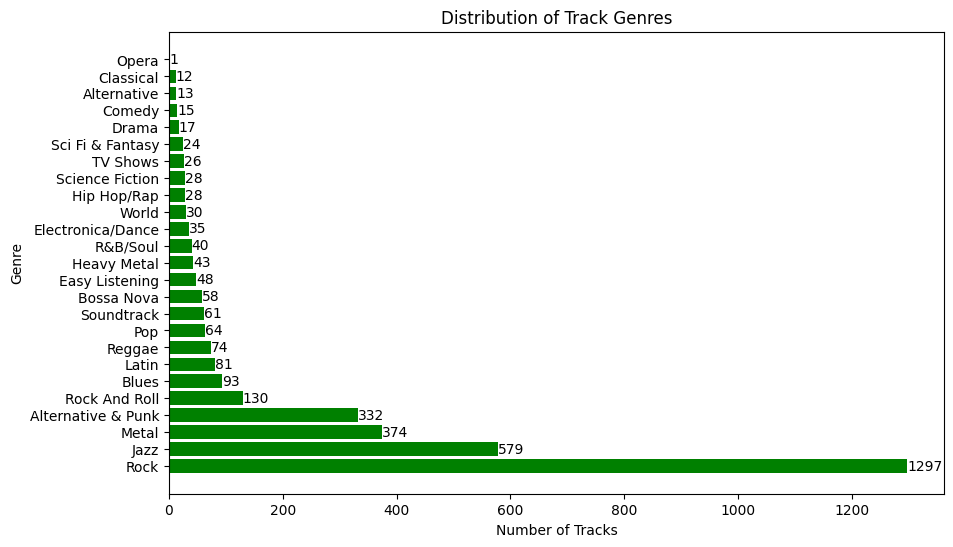

In [109]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
genre_counts_tracks = Track['GenreId'].value_counts()
barhchart = plt.barh(Genre['Name'], genre_counts_tracks, align='center', color='green')

# Add data lables
for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
    
plt.title('Distribution of Track Genres')
plt.ylabel('Genre')
plt.xlabel('Number of Tracks')
plt.show()

B) Media Type

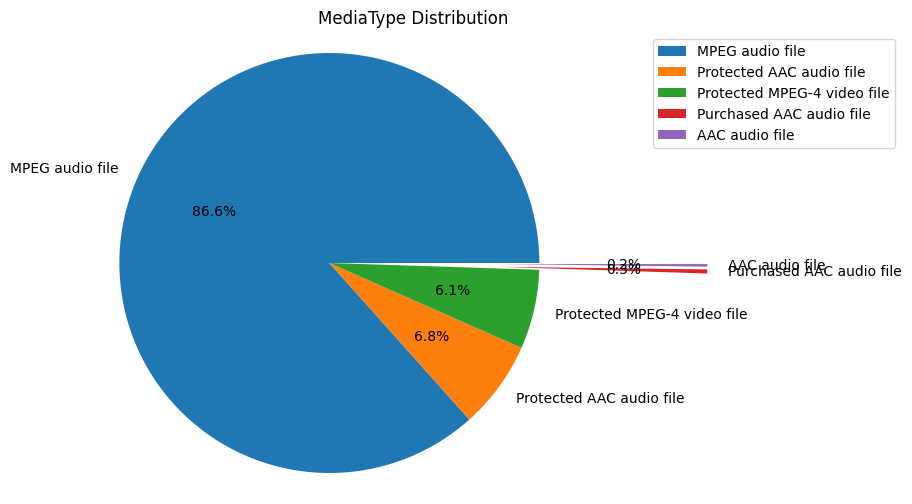

In [239]:
# Pie Plot
plt.figure(figsize=(10,6))
media_counts_tracks = Track['MediaTypeId'].value_counts()
labels = MediaType['Name'].unique()
explode = [0.8 if count < media_counts_tracks.max() * 0.05 else 0 for count in media_counts_tracks]
plt.pie(media_counts_tracks, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('MediaType Distribution')
plt.axis('equal')
plt.legend(loc='best', bbox_to_anchor=(0.8,1))
plt.show()

C) Customers Nationality

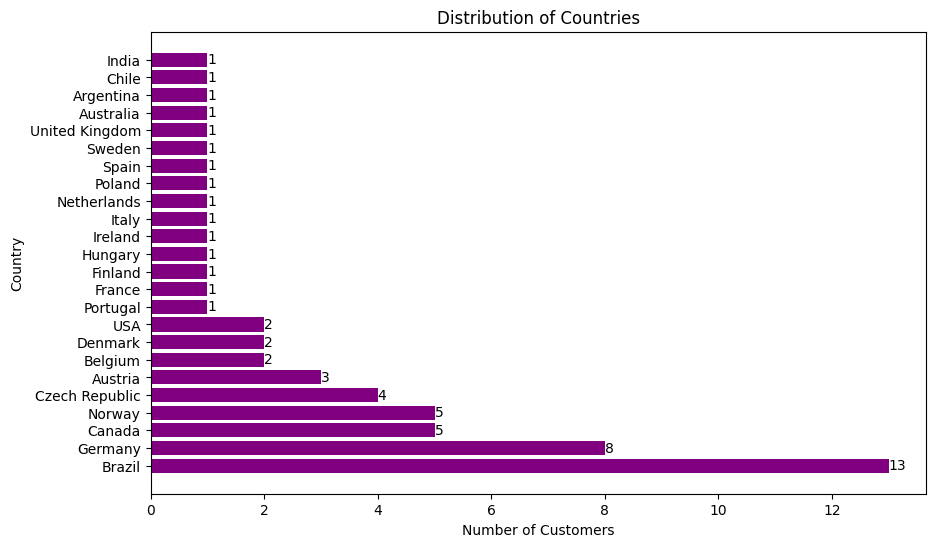

In [270]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
customer_country_count = Customer['Country'].value_counts()
barhchart = plt.barh(Customer['Country'].unique(), customer_country_count, align='center', color='purple')

# Add data lables
for bar in barhchart:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
    
plt.title('Distribution of Countries')
plt.ylabel('Country')
plt.xlabel('Number of Customers')
plt.show()

D) Employee's Job Title

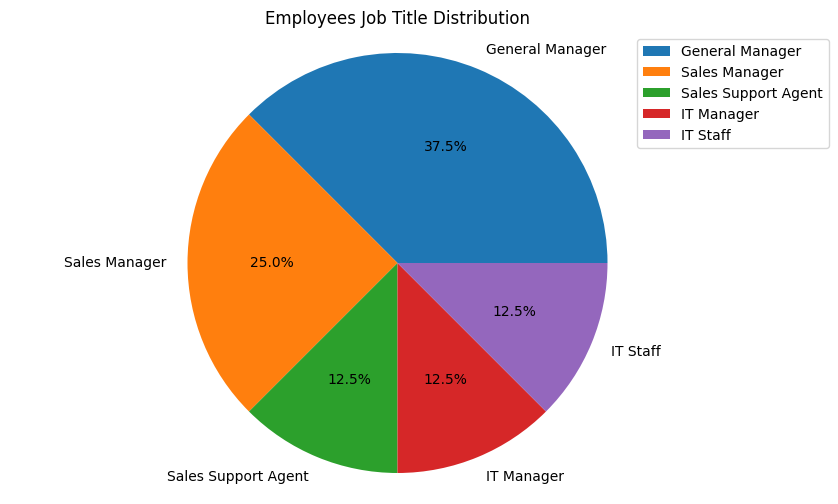

In [296]:
# Pie Plot
plt.figure(figsize=(10,6))
employee_count = Employee['Title'].value_counts()
labels = Employee['Title'].unique()
plt.pie (employee_count, labels=labels, autopct='%1.1f%%')
plt.title('Employees Job Title Distribution')
plt.axis('equal')
plt.legend(loc='best', bbox_to_anchor=(0.8,1))
plt.show()

### 5-2 Check Normality of Numerical Variables 

#### 5-2-1 Track Duration 


A) Histogram 

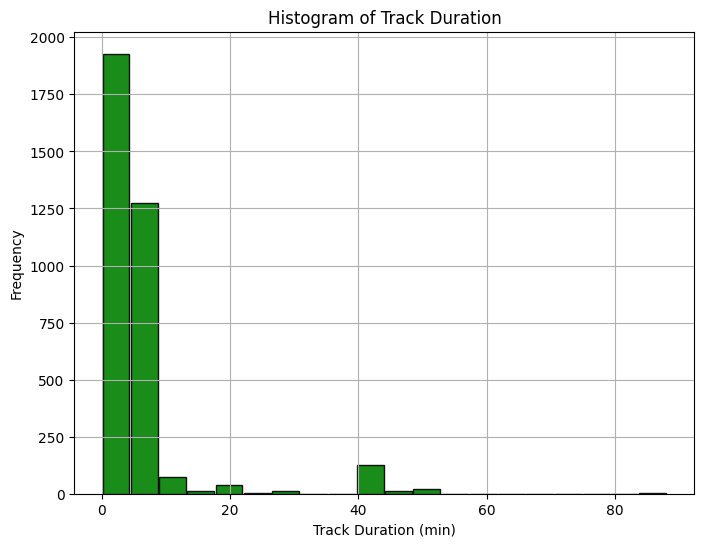

In [294]:
# Histogram
track_time = Track['Milliseconds']/60000
plt.figure(figsize=(8, 6))
plt.hist(track_time, bins=20, alpha=0.9, rwidth=0.95, color='g',edgecolor='k')
plt.title('Histogram of Track Duration')
plt.xlabel('Track Duration (min)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### 5-2-1 Track Duration

 B) Q-Q Plot

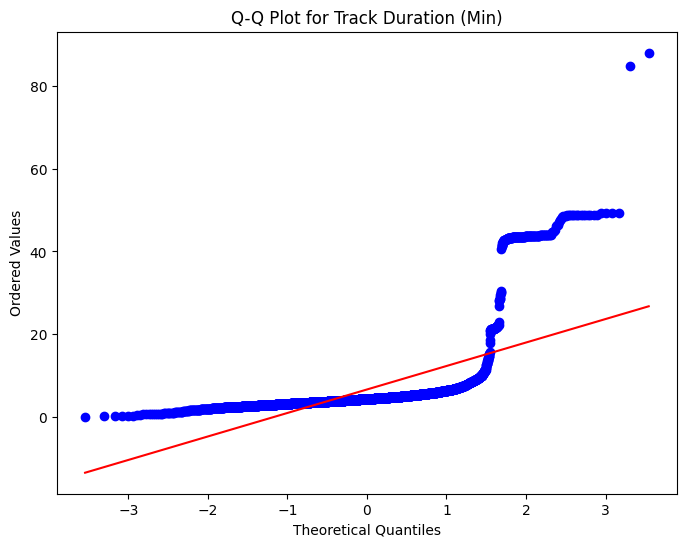

In [298]:
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(Track['Milliseconds']/60000, dist="norm", plot=plt)
plt.title('Q-Q Plot for Track Duration (Min)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

#### 5-2-1 Track Duration

C) Shapiro-Wilk test

In [299]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
statistic, p_value = shapiro(Track['Milliseconds']/60000)
print(f"Shapiro-Wilk Test for Track Duration: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Track Duration data is not normally distributed." )
else:
    print( "Therefore, Track Duration is normally distributed.")

Shapiro-Wilk Test for Track Duration: Statistic = 0.4069350980582944, p-value = 2.7287436202316018e-75
T-statistic: 0.4069350980582944, p-value: 2.7287436202316018e-75
Track Duration data is not normally distributed.


#### 5-2-1 Track Duration

D) Box Plot - Handling Outliers

Min= 0.0178 min, Max= 88.1159 min, Q1= 3.4547 min, median= 4.2606 min, Q3= 5.3607 min
IQR= 1.9061, lower_bound= 0.5956, upper_bound= 8.2198


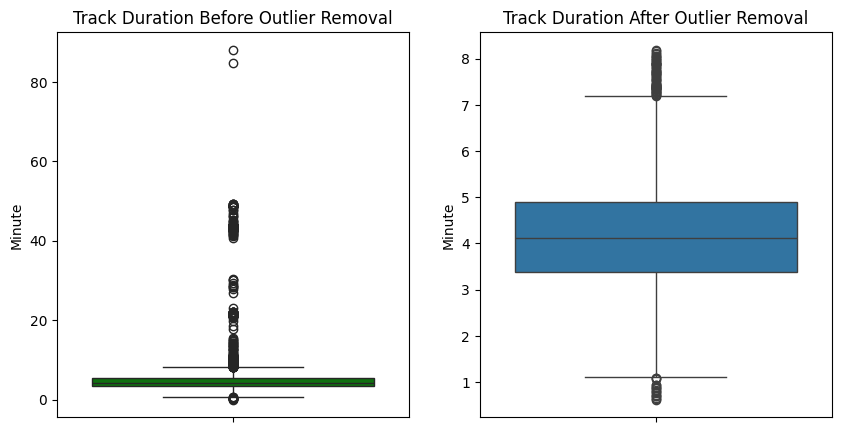

In [330]:
# Box plot Calculations
MIN = np.min(Track['Milliseconds']/60000)
Q1 = np.quantile (Track['Milliseconds']/60000, 0.25)
Q2 = np.quantile (Track['Milliseconds']/60000, 0.5)
Q3 = np.quantile (Track['Milliseconds']/60000, 0.75)
MAX = np.max(Track['Milliseconds']/60000)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Min= {MIN.round(4)} min, Max= {MAX.round(4)} min, Q1= {Q1.round(4)} min, median= {Q2.round(4)} min, Q3= {Q3.round(4)} min')
print(f'IQR= {IQR.round(4)}, lower_bound= {lower_bound.round(4)}, upper_bound= {upper_bound.round(4)}')

# Remove outliers
Track_cleaned = Track[(Track['Milliseconds']/60000 >= lower_bound) & (Track['Milliseconds']/60000 <= upper_bound)]


# Box Plot 
track_time = Track['Milliseconds']/60000
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=track_time, color='green')
plt.title('Track Duration Before Outlier Removal')
plt.ylabel('Minute')

track_time_cleaned = Track_cleaned['Milliseconds']/60000
plt.subplot(1, 2, 2)
sns.boxplot(y=track_time_cleaned)
plt.title('Track Duration After Outlier Removal')
plt.ylabel('Minute')
plt.show()


#### 5-2-2 Track Size 


A) Histogram 

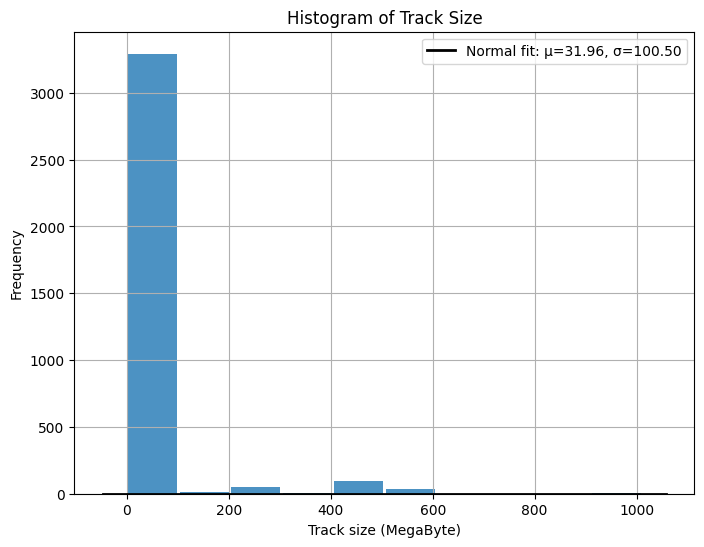

In [289]:
# Create a histogram
plt.figure(figsize=(8, 6))
track_size = Track['Bytes']/1048576
plt.hist(track_size, bins=10, alpha=0.8, rwidth=0.95)
plt.title('Histogram of Track Size')
plt.xlabel('Track size (MegaByte)')
plt.ylabel('Frequency')

# fit a normal distribution
mu, std = norm.fit(track_size) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal fit: μ={mu:.2f}, σ={std:.2f}')
plt.legend()
plt.grid()
plt.show()

Min=0.03695201873779297 MB, Max=1010.4619407653809 MB, Q1=6.048742294311523 MB, Q2=7.732292175292969 MB, Q3=9.791173458099365 MB


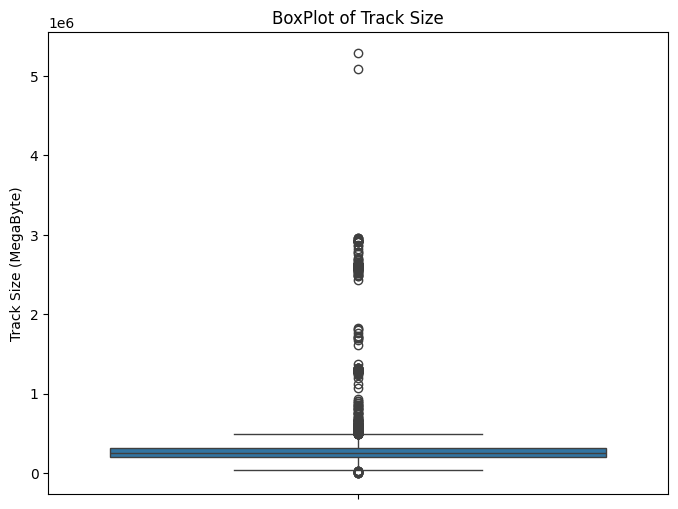

Having outliers


In [266]:
# Box plot
MIN = np.min(Track ['Bytes']/1048576)
Q1 = np.quantile (Track ['Bytes']/1048576, 0.25)
Q2 = np.quantile (Track ['Bytes']/1048576, 0.5)
Q3 = np.quantile (Track ['Bytes']/1048576, 0.75)
MAX = np.max(Track ['Bytes']/1048576)
print(f'Min={MIN} MB, Max={MAX} MB, Q1={Q1} MB, Q2={Q2} MB, Q3={Q3} MB')

# Box Plot
plt.figure(figsize=(8, 6))
track_size = Track['Bytes']/1048576
sns.boxplot(y=track_time)
plt.title('BoxPlot of Track Size')
plt.ylabel('Track Size (MegaByte)')
plt.show()

print(f'Having outliers')

Unit Price

Quantity Sold

Total Sale